## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# for splitting, fitting, and scoring data against regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# for visualizing decision tree
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [2]:
# generating a simple linear regression
# simplest way to model a linear relationship between two variables
# generates a best fit line describing behavior of all data points

# we use a Startups_Invest toy dataset to perform all examples here
# start by importing & cleaning data
data = pd.read_csv('Startups_Invest.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# turn categorical state data into dummy variables
State = pd.get_dummies(data.iloc[:, 3],drop_first=True) # drop to K-1 dummies, which still represents all (3) states
profit = data.iloc[:, 4]
data.drop('State', axis=1, inplace=True)
data.drop('Profit', axis=1, inplace=True)
data = pd.concat([data,State,profit],axis=1)
data.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94


In [4]:
# choosing two variables to explore for a linear relationship - in this case, spend vs profit
X = data['R&D Spend']
y = data['Profit']

# creating a test/training split from data using sklearn module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# fitting linear regression model to our training data
linregression = LinearRegression()
linregression.fit(X_train, y_train)

# using our model to predict results from our test data
y_pred = linregression.predict(X_test)

# quick calls of intercept and coefficients of multivariate regression
intercept = linregression.intercept_
coef = linregression.coef_

print("Intercept: " + str(intercept))
print("Coefficients: " + str(coef))

Intercept: [48676.8117229]
Coefficients: [[0.85072824]]


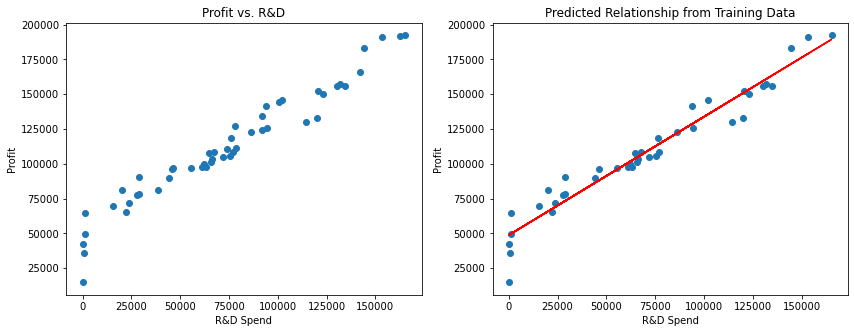

In [5]:
# creating overarching figure
fig = plt.figure(figsize = (14, 5))
fig.subplots_adjust(wspace=.2)


# plotting our two variables against each other
fig.add_subplot(1,2,1)
plt.scatter(X, y)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Profit vs. R&D')

# plotting training data against our linear regression model's prediction
fig.add_subplot(1,2,2)
plt.scatter(X_train, y_train)
plt.plot(X_train, linregression.predict(X_train),'r')
plt.xlabel('R&D Spend')
plt.ylabel("Profit")
plt.title('Predicted Relationship from Training Data')
plt.show()

## Multivariate Linear Regression

In [6]:
# performing multivariate linear regression analysis on categorical variables
# considers more than one variable in the regression equation, better explanatory power
X = data.iloc[:, :-1]
y = data.iloc[:, 5]

# creating a test/training split from data using sklearn module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fitting linear regression model to our training data
linregression = LinearRegression()
linregression.fit(X_train, y_train)

# using our model to predict results from our test data
y_pred = linregression.predict(X_test)

# quick calls of intercept and coefficients of multivariate regression
intercept = linregression.intercept_
coef = linregression.coef_

# these values form the equation of our regression to predict profit, based off each corresponding variable
print("Intercept: " + str(intercept))
print("Coefficients: " + str(coef))

Intercept: 50294.37996177343
Coefficients: [ 7.87920938e-01 -3.39791066e-02  3.55921952e-02  3.43136054e+02
 -1.92317448e+03]


In [7]:
# calculating R squared (R2) score of model to evaluate effectiveness
# compares residuals with total difference between values & mean
# the closer the R2 score is to 1, the better the model
score = r2_score(y_test,y_pred)
score # greater than .60 - a decent model

0.9473744790669559

## Decision Trees

In [8]:
# supervised machine learning algo that predicts based on inferences & rules from training data
# constructs a tree representation - internal nodes represent independent features, leaf nodes represent target variables
# by deciding to choose based off whichever nodes reduce standard deviation the most, the algo constructs a tree we can follow
# using true or false statements to make a final prediction about expected profit

# creating a test/training split from data using sklearn module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creating and fitting decision tree regressor to latest test/training split
decisionregressor = DecisionTreeRegressor()
decisionregressor.fit(X_train, y_train)

# predicting outcomes of test split using our fitted model
y_pred = decisionregressor.predict(X_test)
pd.options.mode.chained_assignment = None  # removes warning of chained assignments - since this doesn't apply to our use case
results = X_test
results['Profit'] = y_test
results['Predicted Profit'] = y_pred
results.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York,Profit,Predicted Profit
44,22177.74,154806.14,28334.72,0,0,65200.33,71498.49
7,130298.13,145530.06,323876.68,1,0,155752.60,156122.51
38,20229.59,65947.93,185265.10,0,1,81229.06,69758.98
41,27892.92,84710.77,164470.71,1,0,77798.83,81005.76
3,144372.41,118671.85,383199.62,0,1,182901.99,156991.12


In [9]:
# measuring effectiveness of our model through it's R2 score
score = r2_score(y_test, y_pred) 
score # values exceeding .6 are worth considering, and close to 1 are very good

0.9122214770040158

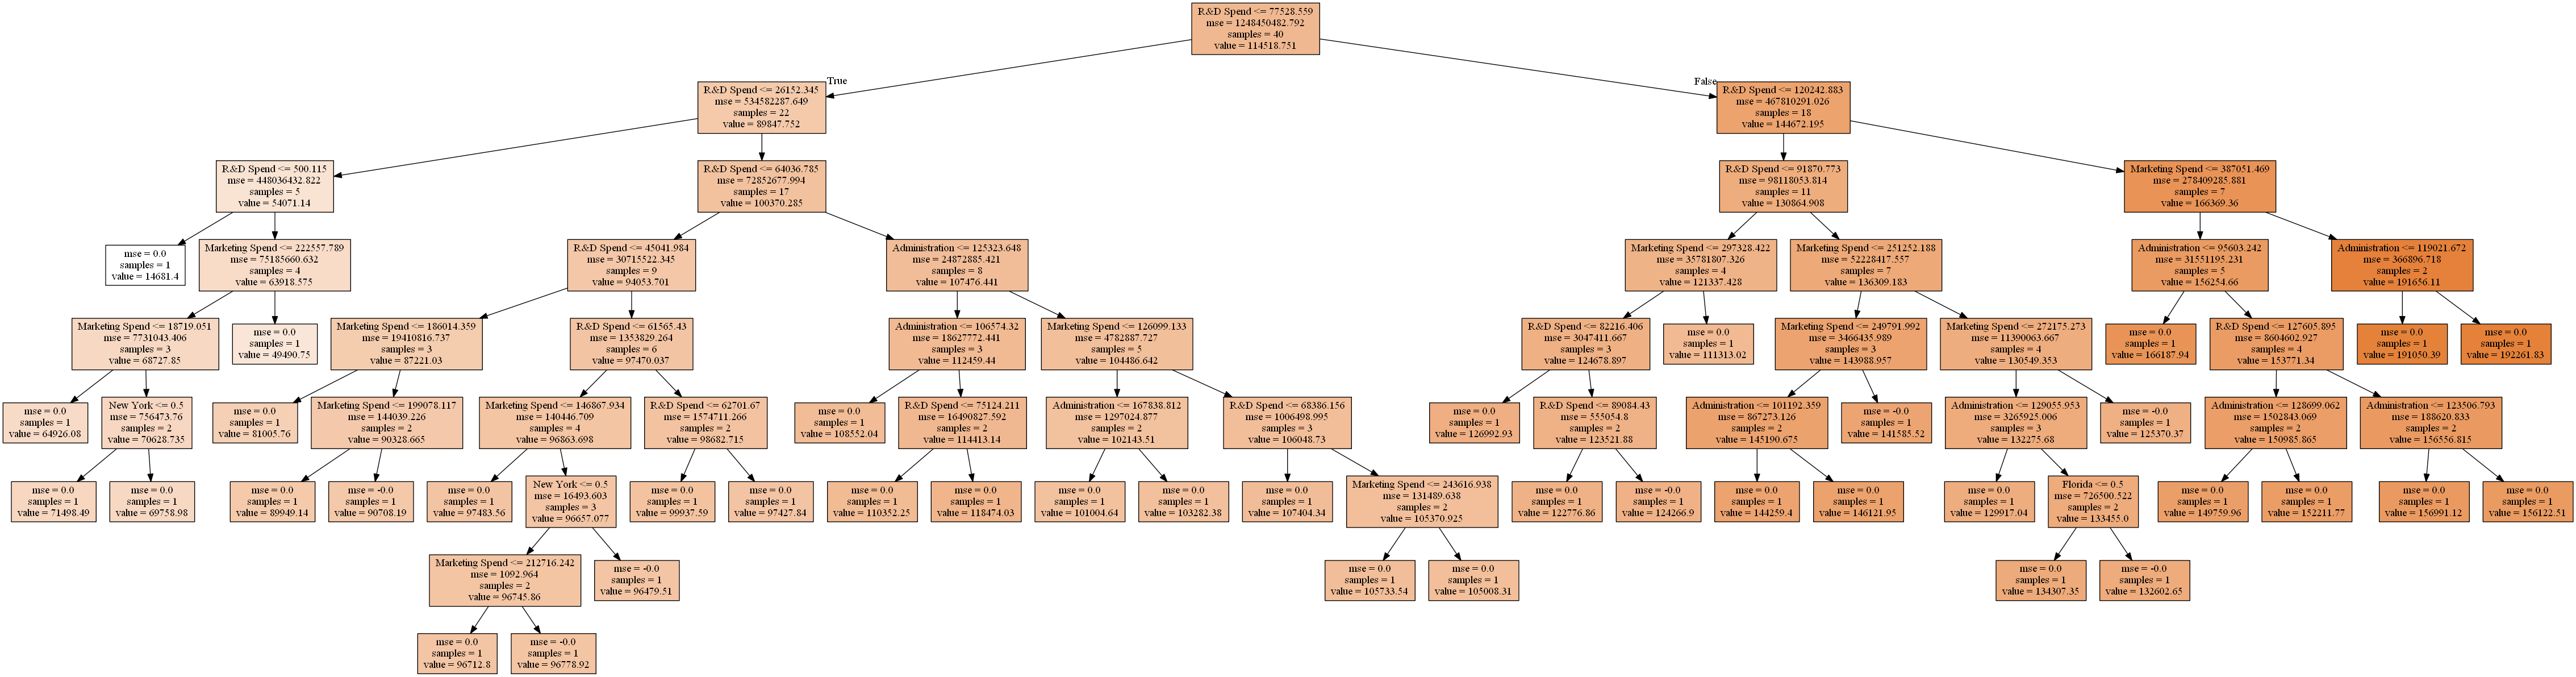

In [10]:
# visualizing the decision tree
features = list(X_train)

dot_data = StringIO()
export_graphviz(decisionregressor, out_file = dot_data, feature_names=features, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())